In [1]:
import Motoresdecombustioninterna as th

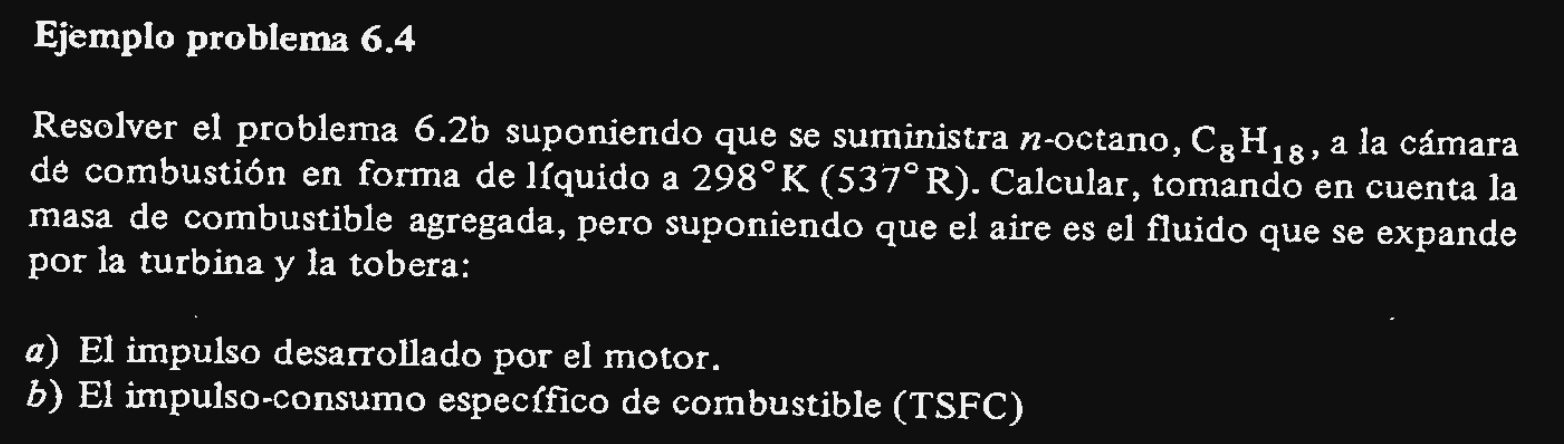

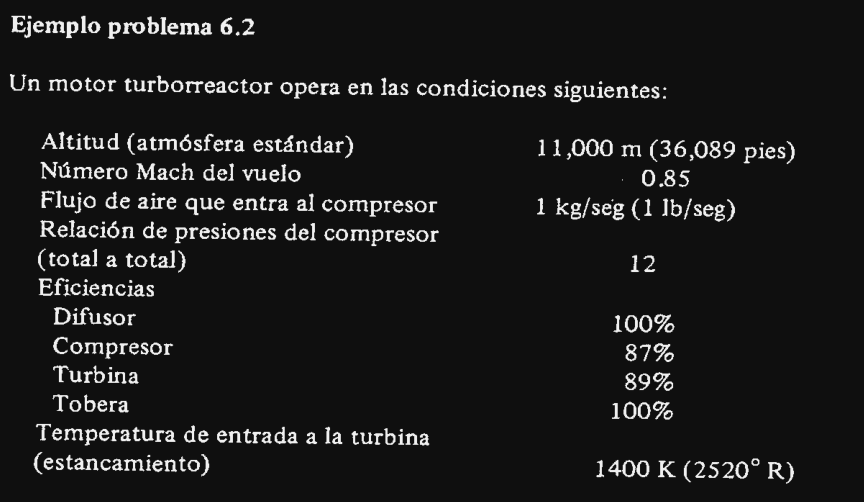
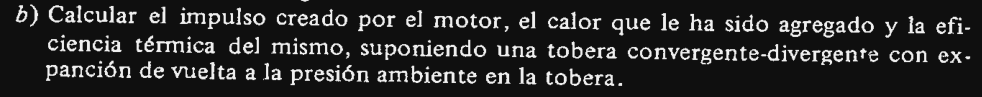

Calcular:

Impulso del motor

Calor agregado

Eficiencia térmica

Suponer tobera convergente-divergente con Pambiente en la tobera

In [2]:
x=8 # OCTANO
TF = 537 # R

In [3]:
h = 36_089 # Altura a nivel del mar en pies
M = 0.85 #N° MACH
MA = 1 # lb/s
RC = 12 # Relación de compresor
#Eficiencias
ND = 1 # Eficiencia de difusor
NC = 0.87 # Eficiencia de compresor
NTUR = 0.89 # Eficiencia de turbina
NTOB = 1 # Eficiencia tobera
T3 = 2520 # °K Temperatura de entrada a la turbina (estancamiento)
U = 1 # SISTEMA INGLES
R = 1.98718 # BTU/mol*R
RVEL = 35.133 # ft*lbf/(lbm*R) para la velocidad
GC = 32.174 # ft*lbm/(s^2*lbm)
FactorCONV = 778.169 #BTU a ft*lbf

# Cámara de combustión

In [4]:
th.reaccionGeneral(x)

La reacción general es
C8H18 + 12.5 O2 --> 8 CO2 + 9.0 H2O
La reacción con aire seco es
C8H18 + 59.6659 AS --> 8 CO2 + 9.0 H2O + 59.6659 AS-12.5 O2


Los moles para la reacción con aire seco

C8H18	1
 O2	-12.5
 CO2	8
 H2O	9.0
Aire	59.6659


In [5]:
# VALORES A MODIFICAR
molC8H18 = 1
molO2    = -12.5
molCO2   = 8
molH2O   = 9
molAireTeorico = 59.6659 #aire teorico, no real

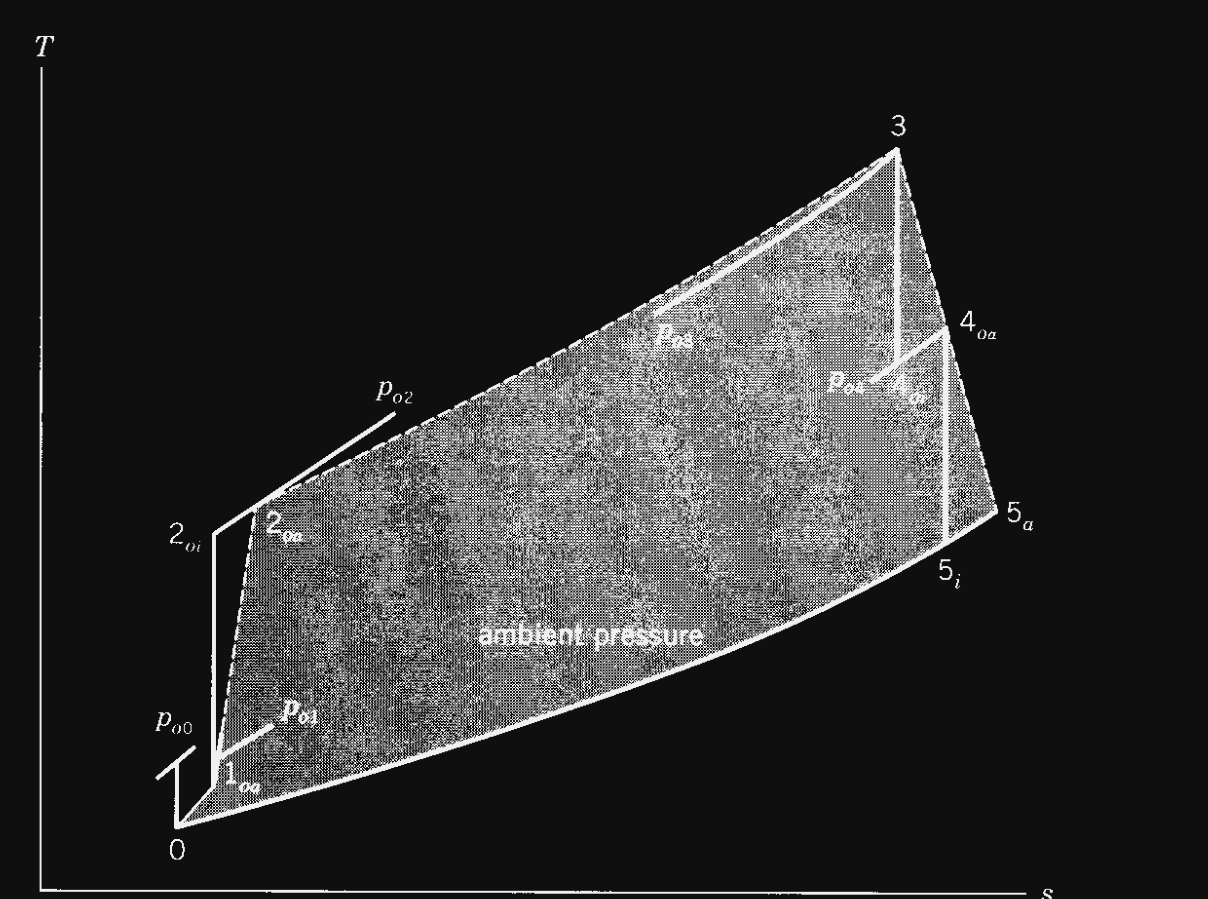
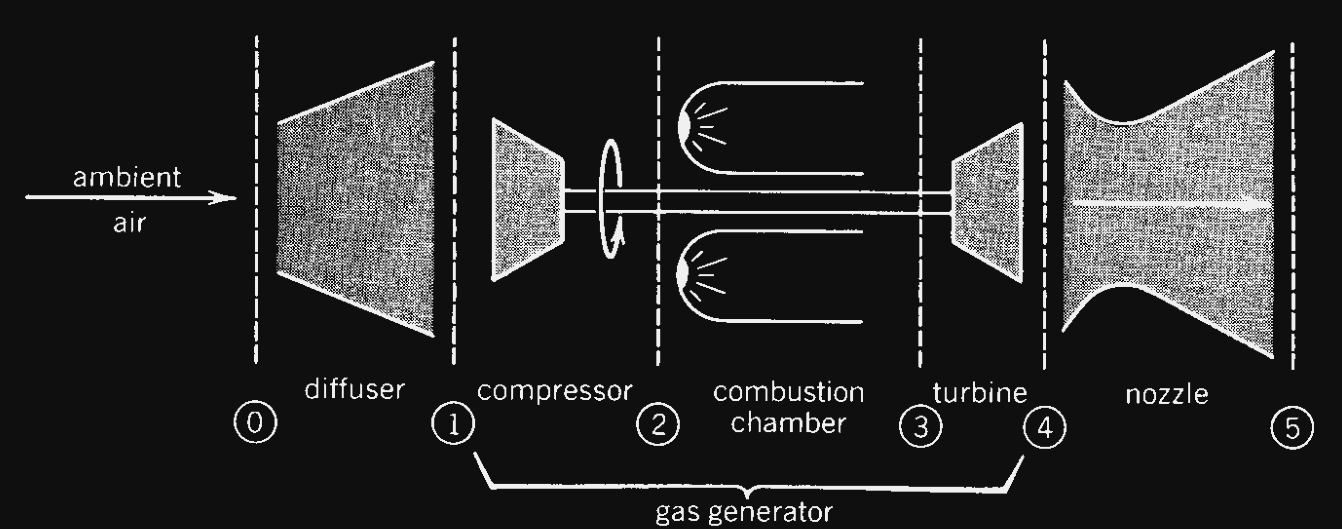

# Valores del punto 1 (Ent. Compresor)

In [6]:
t1,p1 = th.ISApropiedades(U,a=h)

In [7]:
t1 # R

In [8]:
p1 # PSI

In [9]:
K = th.valorK(U,t1)
K

### Difusor

In [10]:
h1,pr1,s1 = th.valoresTablaAire(U,t1)

-1071.0088 h(Btu/mol) | 0.4447764 Pr | 44.146472 s(Btu/mol*R)


In [11]:
v1 = M*(K*GC*R*t1*FactorCONV/(th.aireSecoMol))**(1/2)
v1

Ahora con los valores de h1 y v1 se puede conseguir la ht1 que es la entalpia de estancamiento mediante

In [12]:
ht1 = h1 + (v1**2*th.aireSecoMol)/(2*GC*FactorCONV)
#BTU/mol + BTU/mol
ht1 #BTU/mol

In [13]:
tt1,pr1,st1 = th.valoresTablaAire(U,h=ht1)

446.30523598 Temperatura(R) | 0.71365711 Pr | 45.08436168 s(Btu/mol*R)


In [14]:
pt1 = (tt1/t1)**(K/(K-1))*p1
pt1 # Presión de estancamiento 1

# Sacar valores punto 2 ideal (Ent. Cámara de combustión)

In [15]:
pr2i = th.presionRelativa(pr1,rp=RC)
pr2i

In [16]:
ht2i,tt2i,st2i = th.valoresTablaAire(U,pr=pr2i)

2527.01592376 h(Btu/mol) | 903.60419394 Temperatura(R) | 50.02329292 s(Btu/mol*R)


# Sacar valores punto 2 real (Ent. Cámara de combustión)

In [17]:
ht2r = th.eficienciaCompresor(eficCompresor=NC,h1= ht1,h2i= ht2i)
ht2r

In [18]:
tt2r,pr2r,st2r = th.valoresTablaAire(U,h=ht2r)

970.5341017 Temperatura(R) | 11.07847829 Pr | 50.53395235 s(Btu/mol*R)


In [19]:
pt2 = RC*pt1
pt2

# Valores de cámara de combustión

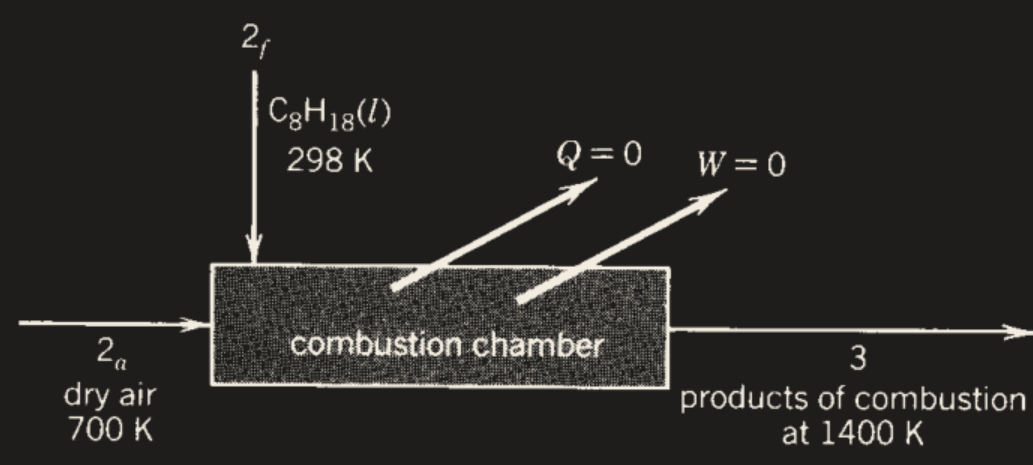

In [20]:
print("Temperatura 2a del aire:",tt2r, "\nTemperatura 3 de los productos:", T3)

Temperatura 2a del aire: 970.5341017 
Temperatura 3 de los productos: 2520


In [21]:
molAireReal = (molCO2*th.moleculaEntalpia("co2",T3,U)
              +molH2O*th.moleculaEntalpia("h2o",T3,U)
              +molO2*th.moleculaEntalpia("o2",T3,U)
              -molC8H18*th.moleculaEntalpia("c8h18",T3,U)
              )/(th.moleculaEntalpia("aire seco",tt2r,U)-th.moleculaEntalpia("aire seco",T3,U))

molAireReal # lmolAire/lbmolCombustible

In [22]:
porcExcesoAire = th.excesoAire(suministradaReal=molAireReal, suministradaTeorica=molAireTeorico)
porcExcesoAire # Porcentaje

In [23]:
relCA = th.relCombustibleAireGases(C=x, CM = 1, AM = molAireReal)
relCA #[lbcombustible/lbaire]

# Valores del punto 3 (Ent. Turbina de gas) 

In [24]:
ht3,pr3,st3 = th.valoresTablaAire(U,t=T3)

15108.5 h(Btu/mol) | 450.9 Pr | 57.901 s(Btu/mol*R)


In [25]:
pt3=pt2
pt3

In [26]:
wCompresorR = ht2r-ht1
wCompresorR #BTU/lbmolAire, valores del aire

In [27]:
wTurbinaR = wCompresorR/(1+(relCA))
wTurbinaR #BTU/lbmolAire

In [28]:
ht4r = ht3-wTurbinaR
ht4r #BTU/lbmolaire

In [29]:
ht4i = th.eficienciaTurbinaGas(eficTurbinaGas=NTUR,h3=ht3,h4r=ht4r)
ht4i #BTU/lbmolaire

In [30]:
tt4i,pr4i,st4i = th.valoresTablaAire(U,h=ht4i)

2025.15762325 Temperatura(R) | 183.55574179 Pr | 56.11437261 s(Btu/mol*R)


In [31]:
pt4 = pt3*(pr4i/pr3)
pt4 #psi

In [32]:
tt4r,pr4r,st4r = th.valoresTablaAire(U,h=ht4r)

2080.3906923 Temperatura(R) | 204.65823038 Pr | 56.33150417 s(Btu/mol*R)


# Tobera convergente-divergente
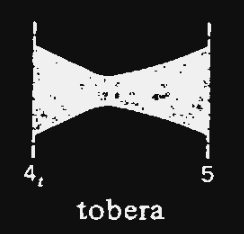

In [33]:
p5=p1
p5

In [34]:
pr5i = pr4r*(p5/pt4)
pr5i #PSI

In [35]:
h5i,t5i,s5i=th.valoresTablaAire(U,pr=pr5i)

4871.76214871 h(Btu/mol) | 1226.34688452 Temperatura(R) | 52.23939865 s(Btu/mol*R)


In [36]:
v5i = ((ht4r-h5i)*(2*GC*778.16)/th.aireSecoMol)**(1/2)
v5i #ft/s

In [37]:
impulsoConvDiv = MA*((1+relCA)*v5i-v1)/GC
impulsoConvDiv #lbf

In [38]:
TSFC = relCA*3600/impulsoConvDiv
TSFC # lbm/lbf-h